In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams['axes.grid'] = False
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

In [4]:
import pandas as pd
import numpy as np
import pickle

In [11]:
df = pd.read_csv("IAPM_data.csv")
df["#NAME?"] = pd.to_datetime(df["#NAME?"], dayfirst=True)
df.rename(columns={"#NAME?":"Datetime"}, inplace=True)
df["Datetime"] = df["Datetime"].apply(lambda x: x.date())
df.set_index("Datetime", inplace=True)
df.drop([col for col in df.columns if "ERROR" in col], axis=1, inplace=True)

In [12]:
tickers = []
for col in df.columns:
    try:
        tickers.append(col.split(" - ")[0])
    except:
        pass

tickers = list(set(tickers))

In [13]:
tickers_to_remove = ["ONE 97 COMMUNICATIONS"]
tickers = [ticker for ticker in tickers if ticker not in tickers_to_remove]

In [5]:
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)

In [8]:
data[data.index>pd.to_datetime("2022-01-01").date()]

,BAJAJ AUTO,BAJAJ HOLDINGS & INVS.,PB FINTECH,CONTAINER CORP.OF INDIA,PIDILITE INDUSTRIES,UNITED SPIRITS,BAJAJ FINSERV,DR REDDYS LABORATORIES,SUN TV NETWORK,PAGE INDUSTRIES,...,NHPC_BETA,INDIAN OIL_BETA,LAURUS LABS_BETA,HDFC ASSET MANAGEMENT COMPANY_BETA,INTERGLOBE AVIATION_BETA,ADITYA FASH.& RETAIL_BETA,UNION BANK OF INDIA_BETA,JSW STEEL_BETA,VARUN BEVERAGES_BETA,DABUR INDIA_BETA
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-03,3277.10,5349.85,952.30,619.80,2473.95,900.60,1698.13,4853.15,504.40,40929.30,...,-0.453949,-0.444525,-0.286313,-0.242805,-0.114924,-0.400168,-0.450773,-0.245569,-0.387568,-0.405090
2022-01-04,3289.15,5293.25,965.05,627.75,2599.20,910.35,1713.54,4835.45,503.35,40959.85,...,-0.454809,-0.445351,-0.287517,-0.247051,-0.116401,-0.400727,-0.451588,-0.246272,-0.388136,-0.405864
2022-01-05,3358.55,5363.75,942.70,629.95,2637.95,899.20,1798.84,4790.40,506.70,41210.95,...,-0.455307,-0.445810,-0.288489,-0.251240,-0.117321,-0.400886,-0.452045,-0.246670,-0.388351,-0.406319
2022-01-06,3418.20,5245.60,890.60,634.25,2646.00,896.90,1798.65,4739.45,512.15,42059.55,...,-0.456059,-0.446525,-0.289614,-0.255491,-0.118520,-0.401235,-0.452756,-0.247214,-0.388828,-0.406988
2022-01-07,3392.50,5173.70,894.20,636.60,2723.45,885.50,1775.69,4708.40,506.45,44087.15,...,-0.456718,-0.447129,-0.290669,-0.259638,-0.119448,-0.401482,-0.453379,-0.247725,-0.389192,-0.407565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-22,4612.10,6884.70,657.20,642.45,2636.30,894.25,1507.65,4899.45,439.75,37958.95,...,-0.225852,-0.229545,-0.288674,-0.096223,0.007131,-0.218146,-0.211513,-0.144386,-0.053392,-0.204084
2023-06-23,4622.60,6832.30,656.95,642.40,2658.30,906.60,1501.95,4993.90,427.75,37676.50,...,-0.225588,-0.229202,-0.288669,-0.096435,0.009461,-0.218477,-0.211330,-0.144400,-0.053228,-0.203936
2023-06-26,4606.90,6961.00,698.50,649.80,2630.90,901.00,1507.55,5041.60,428.55,37851.15,...,-0.225192,-0.228738,-0.288443,-0.097085,0.011692,-0.218699,-0.211036,-0.144309,-0.052538,-0.203628


In [21]:
for ticker in tickers:
    data[f"{ticker}_1mFReturn"] = data[ticker].shift(-30)/data[ticker] - 1

In [31]:
final_tickers = []
for ticker in tickers:
    df = data[-365-30:][[ticker, f"{ticker}_SIZE", f"{ticker}_VAL_ac", f"{ticker}_MOM_ac", f"{ticker}_LOVOL", f"{ticker}_BETA"]]
    if df.isna().sum().sum()==0:
        final_tickers.append(ticker)

In [48]:
from sklearn.linear_model import LinearRegression
from scipy.stats import gmean

In [53]:
results = []
for ticker in final_tickers:
    # Split the data into training and test sets
    train_data = data[-365-30:-30][[f"{ticker}_SIZE", f"{ticker}_VAL_ac", f"{ticker}_MOM_ac", f"{ticker}_LOVOL", f"{ticker}_BETA", f"{ticker}_1mFReturn"]]
    test_data = data[-30:][[f"{ticker}_SIZE", f"{ticker}_VAL_ac", f"{ticker}_MOM_ac", f"{ticker}_LOVOL", f"{ticker}_BETA", f"{ticker}_1mFReturn"]]

    # Define the feature and target columns
    feature_cols = [f"{ticker}_SIZE", f"{ticker}_VAL_ac", f"{ticker}_MOM_ac", f"{ticker}_LOVOL", f"{ticker}_BETA"]
    target_col = f"{ticker}_1mFReturn"

    # Fit a linear regression model to the training data
    lr = LinearRegression()
    lr.fit(train_data[feature_cols], train_data[target_col])

    test_preds = lr.predict(test_data[feature_cols])
    print(f"{ticker} : {gmean(1 + test_preds) - 1}")

    results.append({"Ticker": ticker, "Return": gmean(1 + test_preds) - 1})

APOLLO HOSPS.ENTERPRISE : 0.050498453301628166
STEEL AUTHORITY OF INDIA : -0.03966587009380074
BHARTI AIRTEL : 0.06968582895250242
DABUR INDIA : 0.06570931282645565
BAJAJ HOLDINGS & INVS. : -0.024202473716879114
BHARAT HEAVY ELS. : 0.14440873663408382
MUTHOOT FINANCE : 0.04442450012657351
PIRAMAL ENTERPRISES : 0.056368293320251395
BAJAJ AUTO : 0.10805658739556967
HDFC BANK : -0.027112774807640516
NHPC : 0.040516399532855685
ADANI POWER : 0.2675697008384652
INTERGLOBE AVIATION : 0.031053351639847238
FEDERAL BANK : 0.03471312038595786
NTPC : 0.02277646694910751
P&G.HYGIENE & HLTH.CARE : 0.006930577081530442
BHARAT ELECTRONICS : 0.12095906231688769
NESTLE INDIA : 0.08217724500689672
MPHASIS : -0.09017387251230524
INDIAN HOTELS : 0.03777702702331687
CONTAINER CORP.OF INDIA : 0.09386517190351329
DEEPAK NITRITE : 0.11603399686114546
TATA TLSVS.MAHARASTRA : 0.37400461599579815
VARUN BEVERAGES : 0.15054167396678442
APOLLO TYRES : 0.24675930945484126
TATA STEEL : -0.045584325075362475
ADITYA FA

In [98]:
selected_tickers_df = pd.DataFrame(results).sort_values("Return", ascending=False).head(20).reset_index(drop=True)
selected_tickers_df

,Ticker,Return
0,TATA TLSVS.MAHARASTRA,0.374005
1,DIXON TECHNOLOGIES (INDIA),0.331098
2,CHOLAMANDALAM INV.& FIN.,0.315306
3,ADANI POWER,0.267570
4,APOLLO TYRES,0.246759
5,L&T FINANCE HOLDINGS,0.234108
6,POWER FINANCE,0.220920
7,IDFC FIRST BANK,0.208342
8,REC,0.191920
9,BHARAT FORGE,0.189695


In [58]:
selected_tickers = pd.DataFrame(results).sort_values("Return", ascending=False).head(20).reset_index(drop=True)["Ticker"].tolist()

# Portfolio Optimisation

In [73]:
opt_data = data[-30:][selected_tickers]

In [74]:
def calc_returns(price_data):
    ret = price_data.pct_change().dropna()
    return(ret)

In [75]:
def calc_returns_stats(returns):
    """
    Parameters
        returns: returns timeseries pd.DataFrame object

    Returns:
        mean_returns: Avereage of returns
        cov_matrix: returns Covariance matrix
    """
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    return(mean_returns, cov_matrix)

def portfolio(weights, mean_returns, cov_matrix):

    portfolio_return = np.dot(weights.reshape(1,-1), mean_returns.values.reshape(-1,1))
    portfolio_var = np.dot(np.dot(weights.reshape(1,-1), cov_matrix.values), weights.reshape(-1,1))
    portfolio_std = np.sqrt(portfolio_var)

    return(np.squeeze(portfolio_return),np.squeeze(portfolio_var),np.squeeze(portfolio_std))

In [90]:
num_iter = 5000000

porfolio_var_list = []
porfolio_ret_list = []
w_list =[]

max_sharpe = 0
max_sharpe_var = None
max_sharpe_ret = None
max_sharpe_w = None

daily_ret = calc_returns(opt_data)
mean_returns, cov_matrix = calc_returns_stats(daily_ret)


In [91]:

for i in range(1,num_iter+1):
    rand_weights = np.random.random(len(selected_tickers))
    rand_weights = rand_weights/np.sum(rand_weights)

    porfolio_ret, porfolio_var, portfolio_std = portfolio(rand_weights, mean_returns, cov_matrix)

    # Anuualizing
    porfolio_ret = porfolio_ret * 252
    porfolio_var = porfolio_var * 252
    portfolio_std = portfolio_std * (252**0.5)

    sharpe = (porfolio_ret/(porfolio_var**0.5)).item()
    if sharpe > max_sharpe:
        max_sharpe = sharpe
        max_sharpe_var = porfolio_var.item()
        max_sharpe_ret = porfolio_ret.item()
        max_sharpe_w = rand_weights

    porfolio_var_list.append(porfolio_var)
    porfolio_ret_list.append(porfolio_ret)
    w_list.append(rand_weights)
    if ((i/num_iter)*100)%10 == 0:
        print(f'%{round((i/num_iter)*100)}...',end='')

%10...%20...%30...%40...%50...%60...%70...%80...%90...%100...

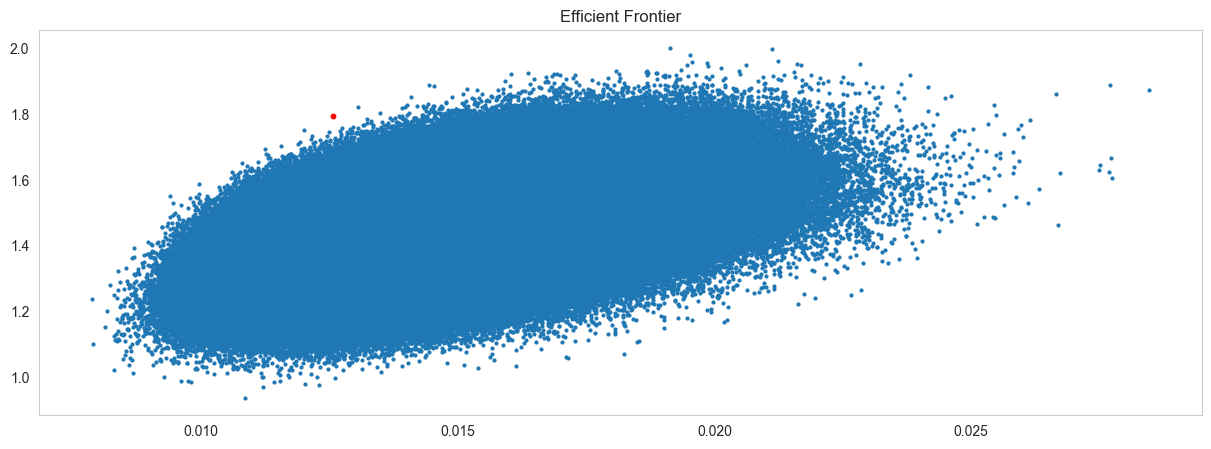

In [96]:
fig = plt.figure()
plt.scatter(porfolio_var_list, porfolio_ret_list, s=4)
plt.scatter(max_sharpe_var, max_sharpe_ret, s=10, color='r')
plt.title("Efficient Frontier")
plt.show()

In [97]:
max_sharpe_w

array([0.05119343, 0.12131034, 0.05826816, 0.00053223, 0.07872792,
       0.03495669, 0.10660077, 0.01994392, 0.08557285, 0.03065995,
       0.01262775, 0.09354977, 0.11402539, 0.03914617, 0.03583894,
       0.00943849, 0.01256107, 0.01840485, 0.00262966, 0.07401164])

In [100]:
selected_tickers_df.drop("Return", axis=1, inplace=True)
selected_tickers_df["Weight"] = max_sharpe_w
selected_tickers_df

,Ticker,Weight
0,TATA TLSVS.MAHARASTRA,0.051193
1,DIXON TECHNOLOGIES (INDIA),0.121310
2,CHOLAMANDALAM INV.& FIN.,0.058268
3,ADANI POWER,0.000532
4,APOLLO TYRES,0.078728
5,L&T FINANCE HOLDINGS,0.034957
6,POWER FINANCE,0.106601
7,IDFC FIRST BANK,0.019944
8,REC,0.085573
9,BHARAT FORGE,0.030660
